<a href="https://colab.research.google.com/github/gillilandim/Gilliard/blob/main/C%C3%B3pia_de_Prova_modulo10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
###### Prova modulo 10

In [ ]:
import numpy as np
from sklearn.datasets import fetch_openml

# Carregando o dataset MNIST
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"].astype(float)

# Convertendo a variável target para 0 (par) e 1 (ímpar)
y_par_impar = (y % 2).astype(int)


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
#### 2. Treinamento de Modelos
Vamos importar as bibliotecas necessárias e definir os modelos.

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Dividir em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y_par_impar, test_size=0.2, random_state=42)

# Listas para armazenar os modelos e suas respectivas curvas ROC
models = {
    "KNN (k=3)": KNeighborsClassifier(n_neighbors=3),
    "KNN (k=5)": KNeighborsClassifier(n_neighbors=5),
    "KNN (k=7)": KNeighborsClassifier(n_neighbors=7),
    "Regressão Logística": LogisticRegression(max_iter=1000)
}

# Para armazenar as AUCs
roc_aucs = {}


In [ ]:
### 3. Validação Cruzada e Cálculo da AUC


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

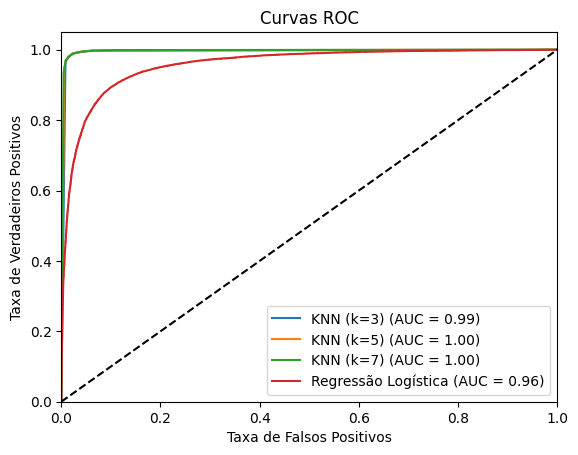

In [ ]:
for model_name, model in models.items():
    # Previsões de probabilidade
    y_scores = cross_val_predict(model, X_train, y_train, cv=5, method='predict_proba')[:, 1]

    # Calcular a AUC
    fpr, tpr, thresholds = roc_curve(y_train, y_scores)
    roc_auc = auc(fpr, tpr)
    roc_aucs[model_name] = roc_auc

    # Plotar a curva ROC
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Adicionar linhas de referência
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curvas ROC')
plt.legend(loc='lower right')
plt.show()
